# Heating prediction of Swiss buildings


This project predicts the heating type of swiss buildings depending on their known data. The model is trained with data from GWR (Gebäude Wohnung Register Schweiz).


## Table of contents

The contents of this project are divided into various categories which are given as follows:-


1.	Introduction

2.	Linear regression intuition

3.	Independent and dependent variables

4.	Assumptions of  linear regression

5.	The dataset description

6.	The problem statement

7.	Import the Python libraries

8.	Import the dataset

9.	Exploratory Data Analysis
    - Explore types of variables
    
    - Estimate correlation coefficients
    
     - Correlation heat map
     
10.	Detect problems within variables
     - Detect missing values
     
     - Outliers in discrete variables
     
     - Number of labels – cardinality
     
11.	Linear Regression modeling
    - Divide the dataset into categorical and numerical variables
    
    - Select the predictor and target variables
    
    - Create separate train and test sets
    
    - Feature Scaling
    
    - Fit the Linear Regression model

12.	Predicting the results
    - Predicting the test set results
    
    - Predicting estimated relative CPU performance values

13.	Model slope and intercept terms

14.	Evaluate model performance
    - RMSE (Root Mean Square Error)
    
    - R2 Score
    
    - Overfitting or Underfitting
    
    - Cross validation
    
    - Residual analysis
    
    - Normality test (Q-Q Plot)
    
15.	Conclusion




## 1. Introduction


In this project, I build a multiple linear regression model to estimate the relative cpu performance of computer hardware dataset. Relative cpu performance of the computer hardware is described in terms of machine cycle time, main memory, cache memory and minimum and maximum channels as given in the dataset.


I discuss the basics and assumptions of linear regression. I also discuss the advantages and disadvantages and common pitfalls of linear regression. I present the implementation in Python programming language using Scikit-learn. Scikit-learn is the popular machine learning library of Python programming language. I also discuss various tools to evaluate the linear regression model performance.


## 2. Multiple linear regression intuition


Linear Regression is a machine learning algorithm which is used to establish the linear relationship between dependent and one or more independent variables. This technique is applicable for supervised learning regression problems where we try to predict a continuous variable. Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. 

I have discussed the linear regression intuition in detail in the readme document.

In this project, I employ Multiple Linear Regression technique where I have one dependent variable and more than one independent variables.


## 3. Independent and dependent variables


In this project, I refer Independent variable as Feature variable and Dependent variable as Target variable. These variables are also recognized by different names as follows: -


**Independent variable**

Independent variable is also called Input variable and is denoted by X. In practical applications, independent variable is also called Feature variable or Predictor variable. We can denote it as: -


Independent or Input variable (X) = Feature variable = Predictor variable 


**Dependent variable**


Dependent variable is also called Output variable and is denoted by y. Dependent variable is also called Target variable or Response variable. It can be denoted it as follows: -


Dependent or Output variable (y) = Target variable = Response variable


## 4. Assumptions of Linear Regression

The Linear Regression model is based on several assumptions which are as follows:-


1. Linear relationship

2. Multivariate normality

3. No or little multi-collinearity

4. No auto-correlation in error terms

5. Homoscedasticity



I have described these assumptions in more detail in readme document.





## 5. Dataset description


Now, we should get to know more about the dataset. It is a computer hardware dataset. The dataset consists of information about the computer vendors selling computers, model name of computers and various attributes to estimate the relative performance of CPU.
The dataset can be found at the following url –

https://archive.ics.uci.edu/ml/datasets/Computer+Hardware


The dataset description will help us to know more about the data.


**Dataset description** is given as follows:-


1. vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
       
2. Model Name: many unique symbols

3. MYCT: machine cycle time in nanoseconds (integer)

4. MMIN: minimum main memory in kilobytes (integer)

5. MMAX: maximum main memory in kilobytes (integer)

6. CACH: cache memory in kilobytes (integer)

7. CHMIN: minimum channels in units (integer)

8. CHMAX: maximum channels in units (integer)

9. PRP: published relative performance (integer)

10. ERP: estimated relative performance from the original article (integer)
  

## 6. The problem statement


A machine learning model is built with the aim of solving a problem. So, first of all I have to define the problem to be solved in this project.

As described earlier, the problem is to estimate the relative CPU performance of computer hardware dataset. Relative CPU performance of the computer hardware is described in terms of machine cycle time, main memory, cache memory and minimum and maximum channels as given in the dataset.

So, let's get started. I will start by importing the required Python libraries.

## 7. Import the Python libraries

In [1]:
# import required Python libraries

# to handle datasets
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## 8. Import the dataset

In [2]:
# import the dataset

engine = create_engine('sqlite:///../data/data.sqlite')

query_training_data = """select b.EGID, STRNAME, DEINR, DPLZ4, GGDENAME, GDEKT,
GKODE, GKODN,
GSTAT, GBAUJ, GKAT, GKLAS,
GAREA, GASTW, GANZWHG,
GWAERZH1, w1.CODTXTLD as GWAERZH1TXT, GENH1, c1.CODTXTLD as GENH1TXT, GWAERDATH1,
GWAERZH2, w2.CODTXTLD as GWAERZH2TXT, GENH2, c2.CODTXTLD as GENH2TXT, GWAERDATH2
from building b,
entrance e,
(select CECODID, CODTXTLD from codes WHERE CMERKM = 'GWAERZH1') w1,
(select CECODID, CODTXTLD from codes WHERE CMERKM = 'GENH1') c1,
(select CECODID, CODTXTLD from codes WHERE CMERKM = 'GWAERZH2') w2,
(select CECODID, CODTXTLD from codes WHERE CMERKM = 'GENH2') c2
WHERE b.GABBJ == ''
AND (GENH1 NOT IN ('', '7500', '7598') OR GENH2 NOT IN ('', '7500', '7598'))
AND b.GWAERZH1 = w1.CECODID
AND b.GENH1 = c1.CECODID
AND b.GWAERZH2 = w2.CECODID
AND b.GENH2 = c2.CECODID
AND e.EGID = b.EGID"""

df = pd.read_sql_query(query_training_data, engine)

## 9. Simple Data Analysis


Now, I will perform Exploratory Data Analysis. It provides useful insights into the dataset which is important for further analysis.

First of all, we should check the dimensions of the dataframe as follows:-

In [3]:
# view the dimensions of dataframe df

print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (305755, 25)


We can see that there are 305755 rows and 27 columns in the dataset. Next, we should get an insight about the dataset.

The **df.head()** function helps us to visualize the first 5 rows of the dataset.

In [4]:
# view the top five rows of dataframe df

df.head()

,EGID,STRNAME,DEINR,DPLZ4,GGDENAME,GDEKT,GKODE,GKODN,GSTAT,GBAUJ,...,GWAERZH1,GWAERZH1TXT,GENH1,GENH1TXT,GWAERDATH1,GWAERZH2,GWAERZH2TXT,GENH2,GENH2TXT,GWAERDATH2
0,11513432,Pöstliweg,5,8914,Aeugst am Albis,ZH,2679647.268,1237500.347,1004,2000,...,7410,Wärmepumpe für ein Gebäude,7511,Erdwärmesonde,2023-10-02,7400,Kein Wärmeerzeuger,7500,Keine,2023-10-02
1,1600017,Reppischtalstrasse,34,8914,Aeugst am Albis,ZH,2680230.492,1237201.59,1004,1870,...,7430,Heizkessel (generisch) für ein Gebäude,7530,Heizöl,2022-07-20,7400,Kein Wärmeerzeuger,7500,Keine,2022-07-20
2,1600029,Chnübrechiweg,4,8914,Aeugst am Albis,ZH,2680642.762,1236862.355,1004,1849,...,7410,Wärmepumpe für ein Gebäude,7511,Erdwärmesonde,2022-01-04,7400,Kein Wärmeerzeuger,7500,Keine,2022-01-04
3,1600030,Hüttliacherweg,4,8914,Aeugst am Albis,ZH,2680643.117,1236909.796,1004,1930,...,7430,Heizkessel (generisch) für ein Gebäude,7530,Heizöl,2001-11-29,7400,Kein Wärmeerzeuger,7500,Keine,2023-01-23
4,1600036,In der Breite,17,8914,Aeugst am Albis,ZH,2679729.361,1237633.405,1004,1900,...,7430,Heizkessel (generisch) für ein Gebäude,7540,Holz (generisch),2023-03-21,7400,Kein Wärmeerzeuger,7500,Keine,2023-03-21


In [5]:
# split df into two parts. Those where the heating tipe is unknown (our prediction data) and those where it's known (our training and validation data)
query_prediction_data = """SELECT * FROM
(
    select b.EGID, STRNAME, DEINR, DPLZ4, GGDENAME, GDEKT,
       GKODE, GKODN,
       GSTAT, GBAUJ, GKAT, GKLAS,
       GAREA, GASTW, GANZWHG,
       GWAERZH1, w1.CODTXTLD as GWAERZH1TXT, GENH1, c1.CODTXTLD as GENH1TXT, GWAERDATH1,
       GWAERZH2, w2.CODTXTLD as GWAERZH2TXT, GENH2, c2.CODTXTLD as GENH2TXT, GWAERDATH2
from building b,
     entrance e,
     (select CECODID, CODTXTLD from codes WHERE CMERKM = 'GWAERZH1') w1,
     (select CECODID, CODTXTLD from codes WHERE CMERKM = 'GENH1') c1,
     (select CECODID, CODTXTLD from codes WHERE CMERKM = 'GWAERZH2') w2,
     (select CECODID, CODTXTLD from codes WHERE CMERKM = 'GENH2') c2
WHERE b.GABBJ == ''
  AND (GENH1 IN ('', '7500', '7598') AND GENH2 IN ('', '7500', '7598'))
  AND b.GWAERZH1 = w1.CECODID
  AND b.GENH1 = c1.CECODID
  AND b.GWAERZH2 = w2.CECODID
  AND b.GENH2 = c2.CECODID
  AND e.EGID = b.EGID
  ORDER BY RANDOM()
)
LIMIT 1000
"""

df_prediction_data = pd.read_sql_query(query_prediction_data, engine)

print("Shape of prediction data: {}".format(df_prediction_data.shape))
df_prediction_data.head()

Shape of prediction data: (1000, 25)


,EGID,STRNAME,DEINR,DPLZ4,GGDENAME,GDEKT,GKODE,GKODN,GSTAT,GBAUJ,...,GWAERZH1,GWAERZH1TXT,GENH1,GENH1TXT,GWAERDATH1,GWAERZH2,GWAERZH2TXT,GENH2,GENH2TXT,GWAERDATH2
0,245039210,Grienmattweg,6b,4450,Sissach,BL,2627645.575,1257694.901,1004,1978,...,7400,Kein Wärmeerzeuger,7500,Keine,2021-08-02,7400,Kein Wärmeerzeuger,7500,Keine,2024-02-21
1,860784,Chemin des Prés du Ruz,2,1580,Avenches,VD,2569837,1191698,1004,1987,...,7410,Wärmepumpe für ein Gebäude,7598,Unbestimmt,2019-02-18,7400,Kein Wärmeerzeuger,7500,Keine,2019-02-18
2,245005718,Bürten,76b,4418,Lauwil,BL,2618641.901,1247268.444,1004,1855,...,7400,Kein Wärmeerzeuger,7500,Keine,2021-08-02,7400,Kein Wärmeerzeuger,7500,Keine,2024-02-21
3,245003775,Zeiningerstrasse,14,4464,Maisprach,BL,2630821.151,1263973.22,1004,1800,...,7400,Kein Wärmeerzeuger,7500,Keine,2021-08-02,7400,Kein Wärmeerzeuger,7500,Keine,2024-02-21
4,243055555,Luftmattstrasse,10.1,4052,Basel,BS,2612307.498,1266411.804,1004,1932,...,7400,Kein Wärmeerzeuger,7500,Keine,2019-12-31,7400,Kein Wärmeerzeuger,7500,Keine,2021-02-01


In [6]:
# select the opposite as test data
df.head()

,EGID,STRNAME,DEINR,DPLZ4,GGDENAME,GDEKT,GKODE,GKODN,GSTAT,GBAUJ,...,GWAERZH1,GWAERZH1TXT,GENH1,GENH1TXT,GWAERDATH1,GWAERZH2,GWAERZH2TXT,GENH2,GENH2TXT,GWAERDATH2
0,11513432,Pöstliweg,5,8914,Aeugst am Albis,ZH,2679647.268,1237500.347,1004,2000,...,7410,Wärmepumpe für ein Gebäude,7511,Erdwärmesonde,2023-10-02,7400,Kein Wärmeerzeuger,7500,Keine,2023-10-02
1,1600017,Reppischtalstrasse,34,8914,Aeugst am Albis,ZH,2680230.492,1237201.59,1004,1870,...,7430,Heizkessel (generisch) für ein Gebäude,7530,Heizöl,2022-07-20,7400,Kein Wärmeerzeuger,7500,Keine,2022-07-20
2,1600029,Chnübrechiweg,4,8914,Aeugst am Albis,ZH,2680642.762,1236862.355,1004,1849,...,7410,Wärmepumpe für ein Gebäude,7511,Erdwärmesonde,2022-01-04,7400,Kein Wärmeerzeuger,7500,Keine,2022-01-04
3,1600030,Hüttliacherweg,4,8914,Aeugst am Albis,ZH,2680643.117,1236909.796,1004,1930,...,7430,Heizkessel (generisch) für ein Gebäude,7530,Heizöl,2001-11-29,7400,Kein Wärmeerzeuger,7500,Keine,2023-01-23
4,1600036,In der Breite,17,8914,Aeugst am Albis,ZH,2679729.361,1237633.405,1004,1900,...,7430,Heizkessel (generisch) für ein Gebäude,7540,Holz (generisch),2023-03-21,7400,Kein Wärmeerzeuger,7500,Keine,2023-03-21


### Explore types of variables


In this section, I will explore the types of variables in the dataset.

First, let's view a concise summary of the dataframe with **df.info()** method.

In [7]:
# view dataframe summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305755 entries, 0 to 305754
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   EGID         305755 non-null  object
 1   STRNAME      305755 non-null  object
 2   DEINR        305755 non-null  object
 3   DPLZ4        305755 non-null  object
 4   GGDENAME     305755 non-null  object
 5   GDEKT        305755 non-null  object
 6   GKODE        305755 non-null  object
 7   GKODN        305755 non-null  object
 8   GSTAT        305755 non-null  object
 9   GBAUJ        305755 non-null  object
 10  GKAT         305755 non-null  object
 11  GKLAS        305755 non-null  object
 12  GAREA        305755 non-null  object
 13  GASTW        305755 non-null  object
 14  GANZWHG      305755 non-null  object
 15  GWAERZH1     305755 non-null  object
 16  GWAERZH1TXT  305755 non-null  object
 17  GENH1        305755 non-null  object
 18  GENH1TXT     305755 non-null  object
 19  GW

We can see that there are just categorical variables in the dataset. 

In [8]:
# find categorical variables

categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 25 categorical variables


In [9]:
# view the categorical variables

print(categorical)

['EGID', 'STRNAME', 'DEINR', 'DPLZ4', 'GGDENAME', 'GDEKT', 'GKODE', 'GKODN', 'GSTAT', 'GBAUJ', 'GKAT', 'GKLAS', 'GAREA', 'GASTW', 'GANZWHG', 'GWAERZH1', 'GWAERZH1TXT', 'GENH1', 'GENH1TXT', 'GWAERDATH1', 'GWAERZH2', 'GWAERZH2TXT', 'GENH2', 'GENH2TXT', 'GWAERDATH2']


check heating type 1

In [10]:
df['GENH1'].value_counts()

GENH1
7530    90624
7520    73594
7501    35606
7580    27005
7540    18672
7511    17097
7560    15867
7510    11706
7541     3657
7542     2957
7513     2046
7581     1719
7599     1586
7598     1401
7570      869
7543      731
7582      420
7512      152
7550       46
Name: count, dtype: int64

check heating type 2

In [11]:
df['GENH2'].value_counts()

GENH2
7500    268059
7560      9735
7570      8753
7540      8167
7530      3238
7541      2020
7520      1461
7501      1175
7598       740
7513       698
7599       592
7542       413
7511       277
7580       208
7510       111
7543        55
7581        18
7512        15
7550        11
7582         9
Name: count, dtype: int64

ibm is the most frequent category in the **Vendor Name** column.

Next, let's explore the **Model Name** column.

In [12]:
print('Number of unique GENH1: ', len(df['GENH1'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique GENH1:  19
Number  of instances of models:  305755


We can see that **Model Name** is a unique identifier for each of the computer models. Thus this is not a variable that we can use to predict the estimated relative performance of computer models. So, we should not use this column for model building.


Now, let's explore the numerical variables.

In [13]:
# find numerical variables

numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 0 numerical variables


In [14]:
# view numerical variables

print(numerical)

[]


So, there are eight numerical variables in the dataset. Let's explore more about them.

In [15]:
# view the top 5 rows of numerical variables

df[numerical].head()

""
0
1
2
3
4


We can see that we have eight numerical variables in the dataset. All the eight numerical variables are of discrete type.

On closer inspection, we find that **PRP** is a redundant column in the dataframe. It denotes **published relative performance**. Our target is to predict **estimated relative performance**. So, we should delete **PRP** from the dataframe.

**Summary : types of variables**


- There are 2 categorical variables and 8 numerical variables.

- The 2 categorical variables, **Vendor Name** and **Model Name** are 2 non-predictive attributes as given in the dataset description. So, I do not use them for model building.

- All of the 8 numerical variables are of discrete type.

- Out of the 8 numerical variables, **PRP** is the linear regression's guess. It is redundant column. I do not use it for model building.

- **ERP** (estimated relative performance is the goal field). It is the target variable.

## 10. Detect problems within variables

### Detect missing values

In [16]:
# let's visualise the number of missing values
df.isnull().sum()

EGID           0
STRNAME        0
DEINR          0
DPLZ4          0
GGDENAME       0
GDEKT          0
GKODE          0
GKODN          0
GSTAT          0
GBAUJ          0
GKAT           0
GKLAS          0
GAREA          0
GASTW          0
GANZWHG        0
GWAERZH1       0
GWAERZH1TXT    0
GENH1          0
GENH1TXT       0
GWAERDATH1     0
GWAERZH2       0
GWAERZH2TXT    0
GENH2          0
GENH2TXT       0
GWAERDATH2     0
dtype: int64

We can confirm that there are no missing values in the dataset.

### Outliers in discrete variables

In [17]:
# let's view the summary statistics of the dataset
df.describe()

,EGID,STRNAME,DEINR,DPLZ4,GGDENAME,GDEKT,GKODE,GKODN,GSTAT,GBAUJ,...,GWAERZH1,GWAERZH1TXT,GENH1,GENH1TXT,GWAERDATH1,GWAERZH2,GWAERZH2TXT,GENH2,GENH2TXT,GWAERDATH2
count,305755,305755,305755,305755,305755,305755,305755,305755,305755,305755,...,305755,305755,305755,305755,305755,305755,305755,305755,305755,305755
unique,291109,45705,5514,3162,2120,26,276055,273562,7,591,...,20,20,19,19,5338,20,20,20,20,5022
top,284686,Hauptstrasse,1,4153,Basel,BL,2670367.333,1201676.453,1004,,...,7430,Heizkessel (generisch) für ein Gebäude,7530,Heizöl,2020-05-19,7400,Kein Wärmeerzeuger,7500,Keine,2024-02-21
freq,53,5009,12012,4485,20146,71691,53,53,287773,87711,...,145787,145787,90624,90624,62874,268058,268058,268059,268059,71756


In [18]:
# outlies in discrete variables

for var in ['GBAUJ', 'GENH1', 'GENH2']:
    print(df[var].value_counts() / float(len(df)))
    print()

GBAUJ
        0.286867
2023    0.019754
2022    0.017975
2021    0.013203
1900    0.012850
          ...   
1458    0.000003
1313    0.000003
1291    0.000003
1288    0.000003
1471    0.000003
Name: count, Length: 591, dtype: float64

GENH1
7530    0.296394
7520    0.240696
7501    0.116453
7580    0.088322
7540    0.061069
7511    0.055917
7560    0.051894
7510    0.038286
7541    0.011961
7542    0.009671
7513    0.006692
7581    0.005622
7599    0.005187
7598    0.004582
7570    0.002842
7543    0.002391
7582    0.001374
7512    0.000497
7550    0.000150
Name: count, dtype: float64

GENH2
7500    0.876712
7560    0.031839
7570    0.028627
7540    0.026711
7530    0.010590
7541    0.006607
7520    0.004778
7501    0.003843
7598    0.002420
7513    0.002283
7599    0.001936
7542    0.001351
7511    0.000906
7580    0.000680
7510    0.000363
7543    0.000180
7581    0.000059
7512    0.000049
7550    0.000036
7582    0.000029
Name: count, dtype: float64


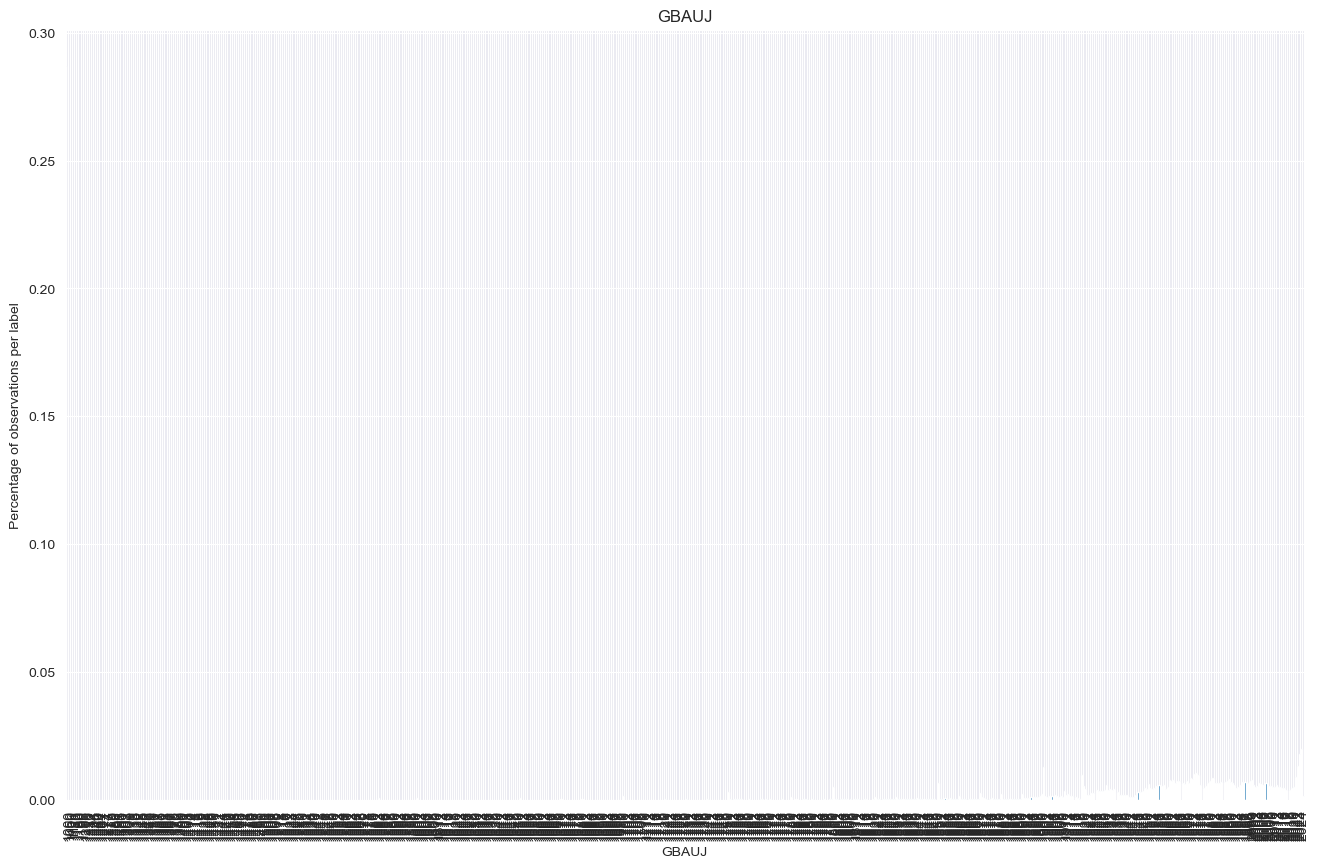

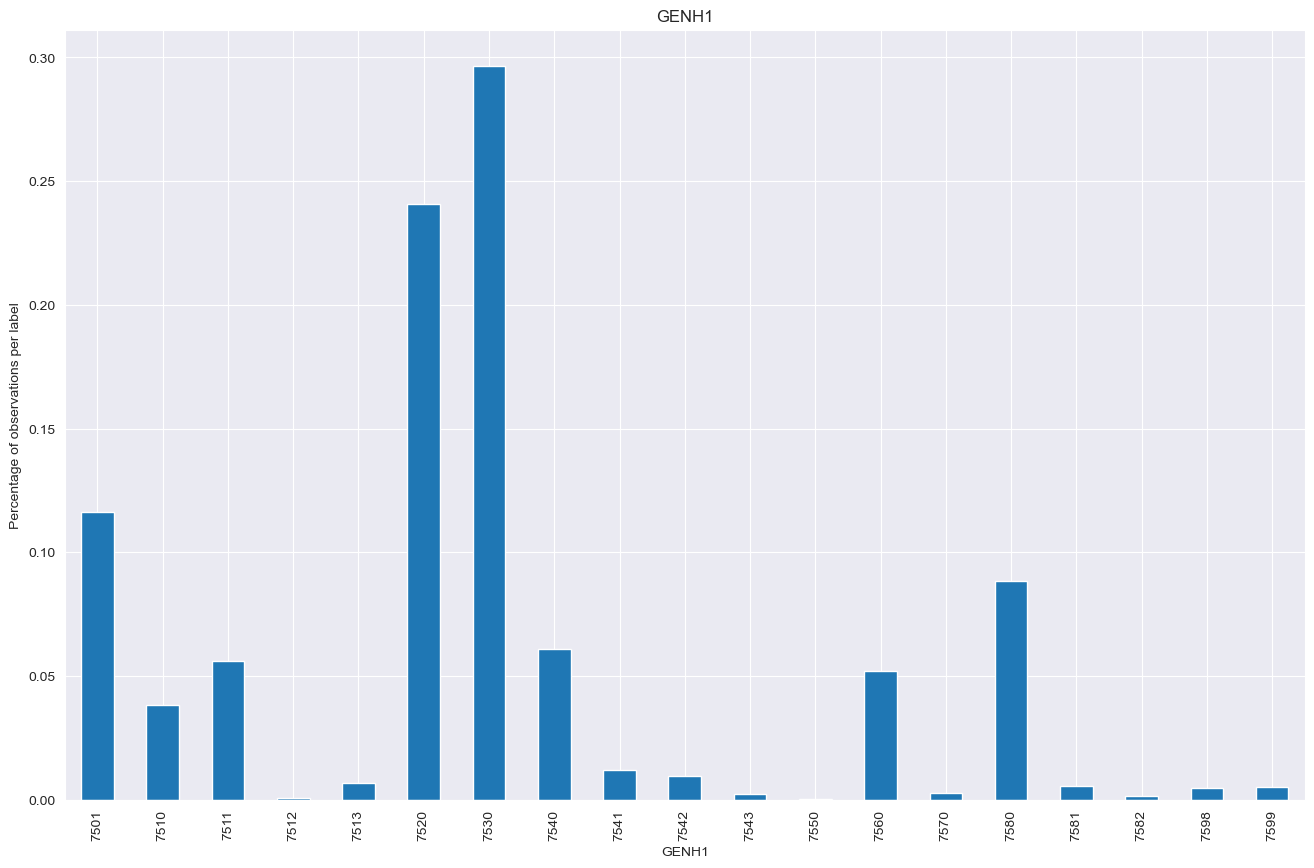

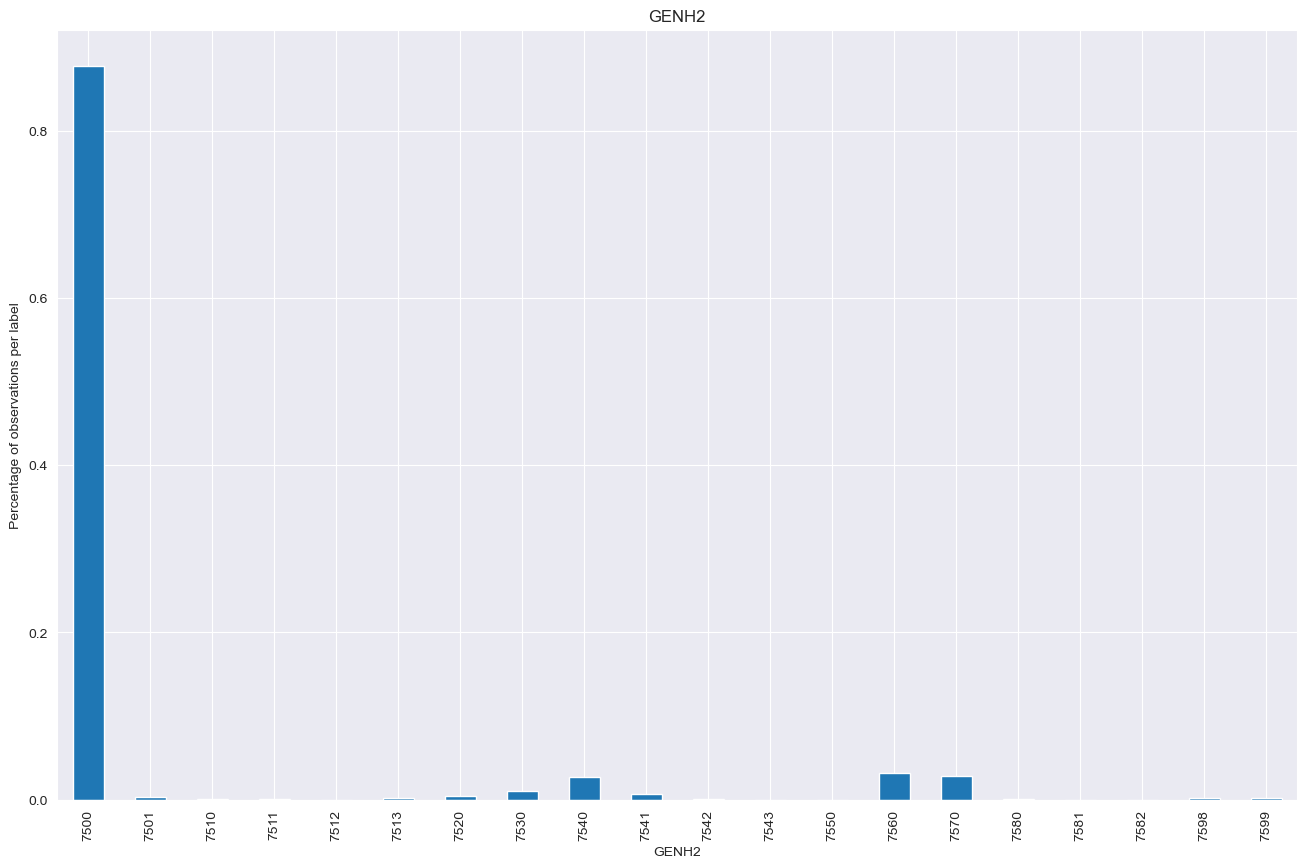

In [19]:
# detect outliers in discrete variables

for var in ['GBAUJ', 'GENH1', 'GENH2']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

From the above plot, we can see that the discrete variables show values that are shared by a tiny proportion of variable values
in the dataset. For linear regression modeling, this does not cause any problem.

### Number of labels: cardinality

Now, I will examine the categorical variable **Vendor Name**. First I will determine whether it show high cardinality. This is a high number of labels.

In [20]:
# plot the categorical variable

plt.figure(figsize=(12,8))
(df['Vendor Name'].value_counts()).plot.bar()
plt.title('Number of categories in Vendor Name variable')
plt.xlabel('Vendor Name')
plt.ylabel('Number of different categories')
plt.show()


KeyError: 'Vendor Name'

<Figure size 1200x800 with 0 Axes>

We can see that the **Vendor Name** variable, contain only a few labels. So, we do not have to deal with high cardinality.

## 11. Linear Regression Modeling


Now, I discuss the most important part of this project which is the Linear Regression model building. 

First of all, I will divide the dataset into categorical and numerical variables as follows:-

### Divide the dataset into categorical and numerical variables



In [ ]:
df_cat = df.iloc[:,:2]

df_num = df.iloc[:, 2:]

In [ ]:
df_num.head()

### Select the predictor and target variables


In [ ]:
X = df_num.iloc[:,0:6]

y = df_num.iloc[:,-1]

print(X.head())
print(y.head())

### Create separate train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

### View the dimensions of X_train, X_test, y_train, y_test

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:
# let's inspect the training dataframe

X_train.head()

In [ ]:
X_train.describe()

### Feature Scaling


In [ ]:
# Feature Scaling - I use the StandardScaler from sklearn

# import the StandardScaler class from preprocessing library
from sklearn.preprocessing import StandardScaler

# instantiate an object scaler
scaler = StandardScaler()

# fit the scaler to the training set and then transform it
X_train = scaler.fit_transform(X_train)

# transform the test set
X_test = scaler.transform(X_test)




The scaler is now ready, we can use it in a machine learning algorithm when required.

### Fit the Linear Regression model

In [ ]:
# fit the linear regression model

# import the LinearRegression class from linear_model library
from sklearn.linear_model import LinearRegression

# instantiate an object lr
lr = LinearRegression()


# Train the model using the training sets
lr.fit(X_train, y_train)


## 12. Predicting the results


I have built the linear regression model. Now it is time to predict the results.

### Predicting the test set results

In [ ]:
# Predict on the test data set
y_pred = lr.predict(X_test)

### Predicting estimated relative CPU performance values

In [ ]:
#print("Predicted ERP - estimated relative performance for the first five values")

lr.predict(X_test)[0:5]

## 13. Model slope and intercept terms

The slope parameters(w) are also called weights or coefficients. They are stored in the **coef_** attribute.

The offset or intercept(b) is stored in the **intercept_** attribute.

So, the model slope is given by **lr.coef_** and model intercept term is given by **lr.intercept_**.

In [ ]:
print("Number of coefficients:", len(lr.coef_))

print("Estimated coefficients: {}".format(lr.coef_))

print("Estimated intercept: {}".format(lr.intercept_))

I constructed a dataframe that contains features and estimated coefficients. 

In [ ]:
dataset = list(zip(pd.DataFrame(X_train).columns, lr.coef_))

pd.DataFrame(data = dataset, columns = ['Features', 'Estimated Coefficients']).set_index('Features')

## 14. Evaluate model performance


I have built the linear regression model and use it to predict the results. Now, it is the time to evaluate the model performance. We want to understand the outcome of our model and we want to know whether the performance is acceptable or not. 
For regression problems, there are several ways to evaluate the model performance. These are listed below:-


•	RMSE (Root Mean Square Error)

•	R2 Score

•	Overfitting Vs Underfitting

•	Cross validation

•	Residual analysis

•	Normality test

I have described these measures in following sections:-


### i.	RMSE

RMSE stands for **Root Mean Square Error**. RMSE is the standard deviation of the residuals. RMSE gives us the standard deviation of the unexplained variance by the model. It can be calculated by taking square root of Mean Squared Error.


RMSE is an absolute measure of fit. It gives us how spread the residuals are, given by the standard deviation of the residuals. The more concentrated the data is around the regression line, the lower the residuals and hence lower the standard deviation of residuals. It results in lower values of RMSE. So, lower values of RMSE indicate better fit of data. 

RMSE can be calculated as follows:-

In [ ]:
# RMSE(Root Mean Square Error)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

### Interpretation

The RMSE value has been found to be 37.99. It means the standard deviation for our prediction is 37.99. So, sometimes we expect the predictions to be off by more than 37.99 and other times we expect less than 37.99. 

### ii. R2 Score

R2 Score is another metric to evaluate performance of a regression model. It is also called **Coefficient of Determination**. It gives us an idea of goodness of fit for the linear regression models. It indicates the percentage of variance that is explained by the model. 


**R2 Score = Explained Variation/Total Variation**



Mathematically, we have



$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$


The total sum of squares, $SS_{tot}=\sum_i(y_i-\bar{y})^2$

The regression sum of squares (explained sum of squares), $SS_{reg}=\sum_i(f_i-\bar{y})^2$

The sum of squares of residuals (residual sum of squares), $SS_{res}=\sum_i(y_i-f_i)^2 = \sum_ie^2_i$




In general, the higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can become negative if our model is wrong.



R2 score value can be found as follows:-


In [ ]:
# R2 Score

from sklearn.metrics import r2_score
print("R2 Score value: {:.2f}".format(r2_score(y_test, y_pred)))

### Interpretation


In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy. 

Our R2 score value has been found to be 0.92. It means that this model explains 92% of the variance in our dependent variable. The R2 score value points to an acceptable model. However, we need to look at residuals.

### iii. Overfitting Vs Underfitting

In [ ]:
# Evaluating training set performance

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))

In [ ]:
# Evaluating test set performance

print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

### Interpretation 

Training set and test set performances are comparable. An R Square value of 0.92 is very good.

### iv. Cross validation


Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model. 

In cross-validation, we split the training data into several subgroups. Then we use each of them in turn to evaluate the model 
fitted on the remaining portion of the data.

It helps us to obtain reliable estimates of the model's generalization performance. So, it helps us to understand how well
the model performs on unseen data.

We can perform cross validation as follows:-

In [ ]:
# import the library
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lr, X, y, cv=5)


In [ ]:
# print the 5-fold cross-validation scores
print(cv_scores.round(4))

In [ ]:
# print the avarage 5-fold cross-validation scores
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores).round(4)))

**Interpretation**

There is a large fluctuation in the cross validation scores of the model. 

The average 5-fold cross validation score is very poor and hence the linear regression model is not a great fit to the data.

### v. Residual analysis


A linear regression model may not represent the data appropriately. The model may be a poor fit to the data. So, we should validate our model by defining and examining residual plots. The difference between the observed value of the dependent variable (y) and the predicted value (ŷi) is called the **residual** and is denoted by e. The scatter-plot of these residuals is called **residual plot**.


If the data points in a residual plot are randomly dispersed around horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise a non-linear model may be more appropriate.


Now, I will plot the residual errors. 

In [ ]:

# Plot for residual error
%matplotlib inline
# adjust the figure size
plt.figure(figsize=(10,8))

# plotting residual errors in training data
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, c = 'g', s = 40, label = 'Train data', alpha = 0.5)


# plotting residual errors in test data
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c = 'r', s = 40, label = 'Test data')

# plotting line for zero residual error
plt.hlines(y = 0, xmin = -100, xmax = 1000, linewidth = 3)

# plotting legend
plt.legend(loc = 'upper right')

# plot title
plt.title("Residual errors plot")

# function to show plot
plt.show()

### Interpretation of residual plots

What do you think of these plots? Remember we are dealing with multivariate regression.
We have to look at more than one set of plots!

A regression model that has nicely fit the data will have its residuals display randomness (i.e., lack of any pattern). This comes from the **homoscedasticity** assumption of regression modeling. Typically scatter plots between residuals and predictors are used to confirm the assumption. Any pattern in the scatter-plot, results in a violation of this property and points towards a poor fitting model.

Residual errors plot from a good model show that the data is randomly scattered around line zero. The plot does not display any pattern in the residuals. 
We see a pattern, and we see that the residuals are larger when x grows, which is a sign of heteroscedasticity.
Hence, we can conclude that the Linear Regression model is not a good fit to these data.

### vi. Normality test (Q-Q Plot)

This is a visual or graphical test to check for normality of the data. This test helps us identify outliers and skewness. The test is performed by plotting the data verses theoretical quartiles. The same data is also plotted on a histogram to confirm normality.

Any deviation from the straight line in normal plot or skewness/multi-modality in histogram shows that the data does not pass the normality test.


Now, I will plot the Q-Q Plot as follows:-


In [ ]:
# plotting the Q-Q plot

import pylab 
import scipy.stats as stats


for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    
    plt.figure(figsize=(15,6))

    plt.subplot(1, 2, 1)
    df[var].hist()
    plt.title('Distribution of '+ var)

    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.title('Q-Q plot of '+ var)

    plt.show() 


**Interpretation**


From the distribution plots, we can see that all the above variables are positively skewed. The Q-Q plot of all the variables confirm that the variables are not normally distributed.

Hence, the variables do not pass the normality test.

## 15. Conclusion



I carry out residual analysis to check for homoscedasticity assumption. Residual errors plot show that the data is randomly scattered around line zero. The plot does not display any pattern in the residuals.  Hence, we can conclude that the Linear Regression model is a good fit to the data.


The r-squared or the coefficient of determination is 0.4691 on an average for 5-fold cross validation. It means that the predictor is only able to explain 46.91% of the variance in the target variable. This indicates that the model is not a good fit to the data.


I carry out normality test to check for distribution of the variables. We can see that the variables do not follow the normal distribution. The Q-Q plots confirm the same.


So, we can conclude that the linear regression model is unable to model the data to generate decent results. It should be noted that the model is performing equally on both training and testing datasets. It seems like a case where we would need to model this data using methods that can model non-linear relationships. Also variables need to be transformed to satisfy the normality assumption.


